In [1]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import Quandl
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.api import abline_plot
import patsy
import seaborn as sns
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, rc=None)
import urllib2 as url
import statsmodels.api as sm
import statsmodels.formula.api as smf

Populating the interactive namespace from numpy and matplotlib


In [2]:
store = pd.read_csv('/Users/jiangzeyu/Dropbox/ADS/data/store.csv')
states = pd.read_csv('/Users/jiangzeyu/Dropbox/ADS/data/store_states.csv')
test = pd.read_csv('/Users/jiangzeyu/Dropbox/ADS/data/test.csv')
sales = pd.read_csv('/Users/jiangzeyu/Dropbox/ADS/data/train.csv', dtype={'StateHoliday': np.character})

In [3]:
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1,1,0,0
1,2,3,4,2015-09-17,1,1,0,0
2,3,7,4,2015-09-17,1,1,0,0
3,4,8,4,2015-09-17,1,1,0,0
4,5,9,4,2015-09-17,1,1,0,0


In [4]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270,9,2008,0,NaN,NaN,NaN
1,2,a,a,570,11,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,a,a,14130,12,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,c,c,620,9,2009,0,NaN,NaN,NaN
4,5,a,a,29910,4,2015,0,NaN,NaN,NaN


In [5]:
sales.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [6]:
print("Sales shape: %s --> columns: %s" % (sales.shape, ", ".join(sales.columns)))
print("Store shape: %s --> columns: %s" % (store.shape, ", ".join(store.columns)))

Sales shape: (1017209, 9) --> columns: Store, DayOfWeek, Date, Sales, Customers, Open, Promo, StateHoliday, SchoolHoliday
Store shape: (1115, 10) --> columns: Store, StoreType, Assortment, CompetitionDistance, CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2, Promo2SinceWeek, Promo2SinceYear, PromoInterval


In [7]:
data = pd.merge(sales, store, on='Store')

In [8]:
newdata = pd.merge(data, states, on='Store')

In [9]:
newdata.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,State
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270,9,2008,0,NaN,NaN,NaN,HE
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270,9,2008,0,NaN,NaN,NaN,HE
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270,9,2008,0,NaN,NaN,NaN,HE
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270,9,2008,0,NaN,NaN,NaN,HE
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270,9,2008,0,NaN,NaN,NaN,HE


In [10]:
ts = newdata.groupby(['Store','CompetitionDistance','State'], as_index=False).Sales.mean()

In [11]:
ts.head()

,Store,CompetitionDistance,State,Sales
0,1,1270,HE,3945.704883
1,2,570,TH,4122.991507
2,3,14130,NW,5741.253715
3,4,620,BE,8021.769639
4,5,29910,SN,3867.110403


In [12]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1112 entries, 0 to 1111
Data columns (total 4 columns):
Store                  1112 non-null int64
CompetitionDistance    1112 non-null float64
State                  1112 non-null object
Sales                  1112 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 43.4+ KB


In [13]:
mod = smf.ols(formula='Sales ~ CompetitionDistance', data = ts).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.275
Date:                Fri, 13 Nov 2015   Prob (F-statistic):              0.259
Time:                        22:57:00   Log-Likelihood:                -10054.
No. Observations:                1112   AIC:                         2.011e+04
Df Residuals:                    1110   BIC:                         2.012e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
Intercept            5815.7751    

In [14]:
ts['logsales'] = np.log(ts['Sales'])
ts['logcom'] = np.log(ts['CompetitionDistance'])

In [15]:
mod1 = smf.ols(formula='logsales ~ logcom', data = ts).fit()
print(mod1.summary())

                            OLS Regression Results                            
Dep. Variable:               logsales   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     5.616
Date:                Fri, 13 Nov 2015   Prob (F-statistic):             0.0180
Time:                        22:57:07   Log-Likelihood:                -302.71
No. Observations:                1112   AIC:                             609.4
Df Residuals:                    1110   BIC:                             619.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      8.7180      0.048    182.179      0.0

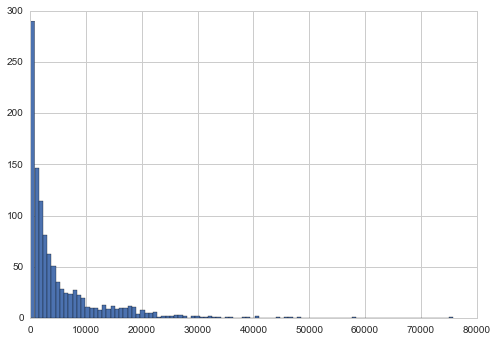

In [16]:
store['CompetitionDistance'].hist(bins=100)

/Users/jiangzeyu/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


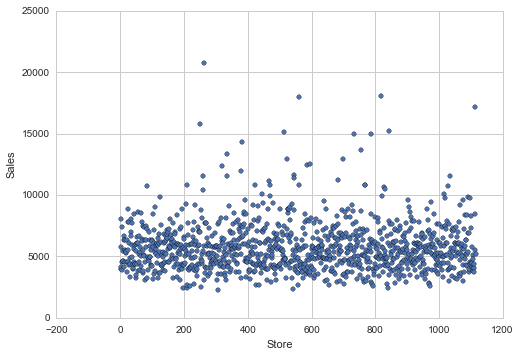

In [17]:
ts[['Store', 'Sales']].plot(kind='scatter', x='Store', y='Sales')

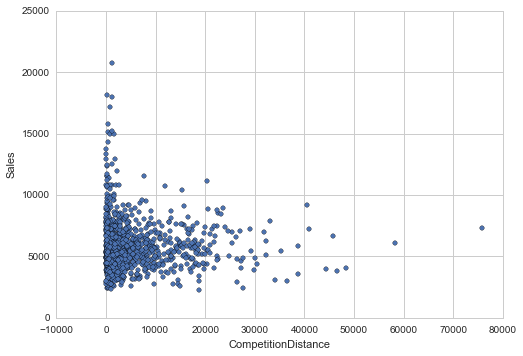

In [18]:
ts[['CompetitionDistance', 'Sales']].plot(kind='scatter', x='CompetitionDistance', y='Sales')

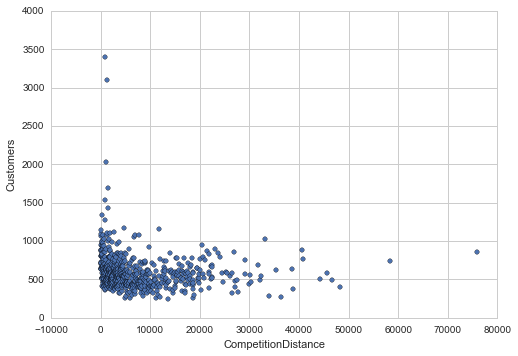

In [19]:
avg_per_com = newdata[['Customers', 'CompetitionDistance']].groupby('CompetitionDistance').mean()
avg_per_com.reset_index().plot(kind='scatter', x='CompetitionDistance', y='Customers')

In [20]:
cs = newdata.groupby(['Store','Customers','State'], as_index=False).Sales.mean()

In [21]:
cs.head()

,Store,Customers,State,Sales
0,1,0,HE,0
1,1,298,HE,2362
2,1,327,HE,2605
3,1,368,HE,2749
4,1,378,HE,2462


In [22]:
cs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417947 entries, 0 to 417946
Data columns (total 4 columns):
Store        417947 non-null int64
Customers    417947 non-null int64
State        417947 non-null object
Sales        417947 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 15.9+ MB


In [23]:
mod2 = smf.ols(formula='Sales ~ Customers', data = cs).fit()
print(mod2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                 9.337e+05
Date:                Fri, 13 Nov 2015   Prob (F-statistic):               0.00
Time:                        22:57:37   Log-Likelihood:            -3.7604e+06
No. Observations:              417947   AIC:                         7.521e+06
Df Residuals:                  417945   BIC:                         7.521e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   2180.8805      6.241    349.456      0.0

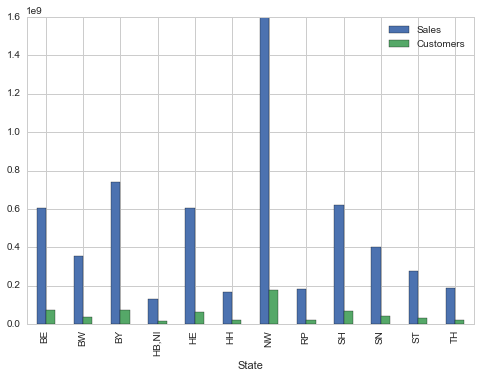

In [55]:
state_count = newdata[['Sales','Customers', 'State']].groupby('State').sum()
state_count.head()
state_count.plot(kind='bar')

In [56]:
state_count.head()

,Sales,Customers
State,,
BE,604709903,72259364
BW,355745661,38325902
BY,742361827,70604932
"HB,NI",131144129,17089409
HE,603605998,62248656


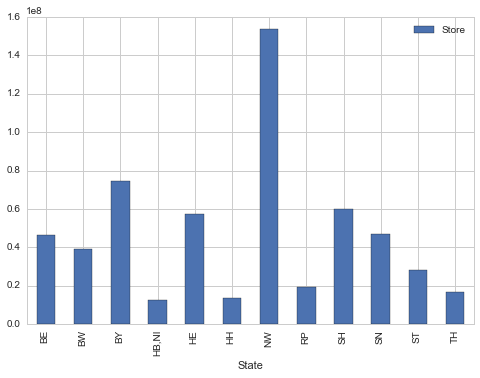

In [57]:
store_count = newdata[['Store', 'State']].groupby('State').sum()
store_count.plot(kind='bar')

In [58]:
store_count.head()

,Store
State,
BE,46160826
BW,39067566
BY,74330996
"HB,NI",12467370
HE,57493086
